# AmadeusGPT Demo: Horse Gait Analysis

- please get an openAI user key: https://platform.openai.com/api-keys.
- We suggest to run the demos locally, but it can be viewed on Google Colab. Some interactive features might not be available.

In [ ]:
!pip install --pre amadeusgpt

- Let's test that your open AI API Key works:

In [2]:
mykey = "your-key-here"

In [3]:
import os
if 'OPENAI_API_KEY' not in os.environ:
     os.environ['OPENAI_API_KEY'] = mykey

In [4]:
from openai import OpenAI

client = OpenAI(api_key=mykey)

response = client.chat.completions.create(
    model="gpt-4",
    messages=[{"role": "user", "content": "Hello AmadeusGPT"}]
)
print(response.choices[0].message.content)

Hello! How can I assist you today?


In [5]:
from amadeusgpt import AMADEUS
from amadeusgpt.config import Config
import amadeusgpt
from pathlib import Path
import matplotlib.pyplot as plt
from amadeusgpt.utils import parse_result
from amadeusgpt import create_project

## Please upload the demo video and associated files:
- you can grab it from here: https://github.com/AdaptiveMotorControlLab/AmadeusGPT/tree/mwm/docs/examples/Horse


In [ ]:
from google.colab import files

uploaded = files.upload()
for filepath, content in uploaded.items():
  print(f'User uploaded file "{filepath}" with length {len(content)} bytes')

video_path = Path(filepath).resolve()

- Set the scene number to visualize your video in a specific frame

- 🔥 Make sure your animal(s) are visible on that frame so gpt-4o can configure AmadeusGPT correctly

In [6]:
scene_frame_number = 100
amadeus_root = Path(amadeusgpt.__file__).parent.parent
config = Config(amadeus_root / "amadeusgpt/configs/Horse_template.yaml") #check the path to the config file

kwargs = {   
    "video_info.scene_frame_number" : scene_frame_number,
    "llm_info": {
                "gpt_model": "gpt-4o",
    }

}

config = create_project(data_folder = "../examples/Horse", #check the path to the data folder
                        result_folder = "results",
                        **kwargs
                        )

amadeus = AMADEUS(config, use_vlm = True)
video_file_paths = amadeus.get_video_file_paths()
print (video_file_paths)  

Project created at results. Results will be saved to results
The project will load video files (*.mp4) and optionally keypoint files from ../examples/Horse
A copy of the project config file is saved at results/config.yaml
{'data_info': {'data_folder': '../examples/Horse',
               'result_folder': 'results',
               'video_suffix': '.mp4'},
 'keypoint_info': {'include_confidence': False, 'use_3d': False},
 'llm_info': {'gpt_model': 'gpt-4o'},
 'object_info': {'load_objects_from_disk': False, 'use_grid_objects': False},
 'video_info': {'scene_frame_number': 100}}


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


current total cost 0.0031 $
current input tokens 438
current accumulated tokens 501
description of the image frame provided
```json
{
    "description": "A person walking a horse in an outdoor setting with trees and a tent in the background.",
    "individuals": 1,
    "species": "sideview_quadruped",
    "background_objects": ["trees", "tent", "building"]
}
```
['../examples/Horse/BrownHorseinShadow.mp4']


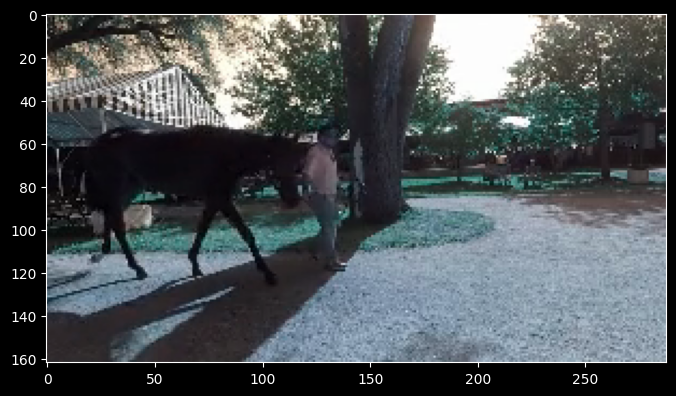

In [7]:
behavior_analysis = amadeus.get_behavior_analysis(video_file_path = '../examples/Horse/BrownHorseinShadow.mp4') #check the path to the video file
scene_image = behavior_analysis.visual_manager.get_scene_image()
plt.imshow(scene_image)

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


current total cost 0.0224 $
current input tokens 2956
current accumulated tokens 3754


To plot the gait analysis using the specified keypoints, we can utilize the `run_gait_analysis` and `plot_gait_analysis_results` functions from the provided API. The keypoints you mentioned are 'Offfrontfoot', 'Offfrontfetlock', 'Offknee', 'Elbow', and 'Shoulder'. 

Let's proceed with writing the code to perform and plot the gait analysis using these keypoints. 

```python
def plot_gait_analysis(identifier):
    '''
    Parameters:
    ----------
    identifier: Identifier. Contains information about the video, keypoint and config
    '''
    # Create an instance of AnimalBehaviorAnalysis
    analysis = create_analysis(identifier)
    
    # Define the keypoints for gait analysis
    limb_keypoint_names = ['Offfrontfoot', 'Offfrontfetlock', 'Offknee', 'Elbow', 'Shoulder']
    
    # Run gait analysis
    gait_analysis_results = analysis.run_gait_analysis(limb_keypoint_names=limb_keypoint_names)
    
    # Plot the gait analysis results
    figure, axs = analysis.plot_gait_analysis_results(gait_analysis_results=gait_analysis_results,
                                                      limb_keypoints=limb_keypoint_names,
                                                      color_stance="plum")
    
    return figure, axs
```

This function will perform the gait analysis using the specified keypoints and plot the results. The plot will be returned as a tuple containing the figure and axes objects.

(<Figure size 800x800 with 1 Axes>, <AxesSubplot:ylabel='Limb'>)

(<Figure size 800x800 with 1 Axes>, <AxesSubplot:ylabel='Limb'>)

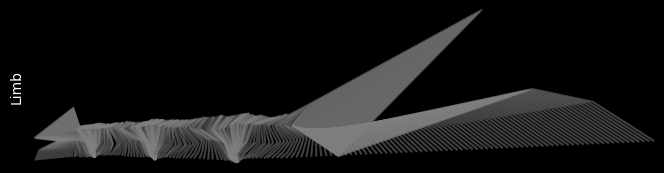

In [8]:
query = "Plot the gait analysis using the keypoints Offfrontfoot; Offfrontfetlock; Offknee; Elbow and Shoulder."
qa_message = amadeus.step(query)
qa_message = parse_result(amadeus, qa_message)

In [11]:
query = "What keypoints are in this data?"
qa_message = amadeus.step(query)
qa_message = parse_result(amadeus, qa_message)

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"


doing active forgetting


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


current total cost 0.0914 $
current input tokens 3531
current accumulated tokens 15146


The keypoints available in this data are:

1. Nose
2. Eye
3. Nearknee
4. Nearfrontfetlock
5. Nearfrontfoot
6. Offknee
7. Offfrontfetlock
8. Offfrontfoot
9. Shoulder
10. Midshoulder
11. Elbow
12. Girth
13. Wither
14. Nearhindhock
15. Nearhindfetlock
16. Nearhindfoot
17. Hip
18. Stifle
19. Offhindhock
20. Offhindfetlock
21. Offhindfoot
22. Ischium

These keypoints represent various body parts of the animal in the data.

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"


doing active forgetting


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


current total cost 0.1418 $
current input tokens 3474
current accumulated tokens 22893


To plot the keypoints "Nose", "Hip", and "Nearhindfoot" over time with the Y-axis inverted, we can modify the plot to invert the Y-axis. This can be done by setting the `ylim` in reverse order. Here's the code:

```python
def plot_keypoints_over_time_inverted_y(identifier):
    '''
    Plots the Nose, Hip, and Nearhindfoot keypoints over time with the Y-axis inverted.

    Parameters:
    ----------
    identifier: Identifier. Contains information about the video, keypoint, and config.
    '''
    # Create an instance of AnimalBehaviorAnalysis
    analysis = create_analysis(identifier)
    
    # Get keypoints data
    keypoints = analysis.get_keypoints()  # shape (n_frames, n_individuals, n_kpts, n_dims)
    
    # Get keypoint names to find indices
    keypoint_names = analysis.get_keypoint_names()
    
    # Find indices for the required keypoints
    nose_index = keypoint_names.index('Nose')
    hip_index = keypoint_names.index('Hip')
    nearhindfoot_index = keypoint_names.index('Nearhindfoot')
    
    # Extract the x and y coordinates for the required keypoints
    nose_data = keypoints[:, 0, nose_index, :]  # shape (n_frames, n_dims)
    hip_data = keypoints[:, 0, hip_index, :]  # shape (n_frames, n_dims)
    nearhindfoot_data = keypoints[:, 0, nearhindfoot_index, :]  # shape (n_frames, n_dims)
    
    # Create a figure and axis
    fig, ax = plt.subplots(1, 1, figsize=(10, 6))
    
    # Plot the keypoints over time
    ax.plot(nose_data[:, 0], nose_data[:, 1], label='Nose', color='r')
    ax.plot(hip_data[:, 0], hip_data[:, 1], label='Hip', color='g')
    ax.plot(nearhindfoot_data[:, 0], nearhindfoot_data[:, 1], label='Nearhindfoot', color='b')
    
    # Set labels and title
    ax.set_xlabel('X Coordinate')
    ax.set_ylabel('Y Coordinate')
    ax.set_title('Keypoints Over Time with Inverted Y-axis')
    ax.set_xlim(0, 288)  # xlim covers the whole image width
    ax.set_ylim(162, 0)  # ylim is inverted to cover the whole image height
    ax.legend()
    
    return fig, ax
```

This function will plot the x and y coordinates of the "Nose", "Hip", and "Nearhindfoot" keypoints over time, with the Y-axis inverted, allowing you to visualize their movement throughout the video with the inverted Y-axis.

(<Figure size 1000x600 with 1 Axes>, <AxesSubplot:title={'center':'Keypoints Over Time with Inverted Y-axis'}, xlabel='X Coordinate', ylabel='Y Coordinate'>)

(<Figure size 1000x600 with 1 Axes>, <AxesSubplot:title={'center':'Keypoints Over Time with Inverted Y-axis'}, xlabel='X Coordinate', ylabel='Y Coordinate'>)

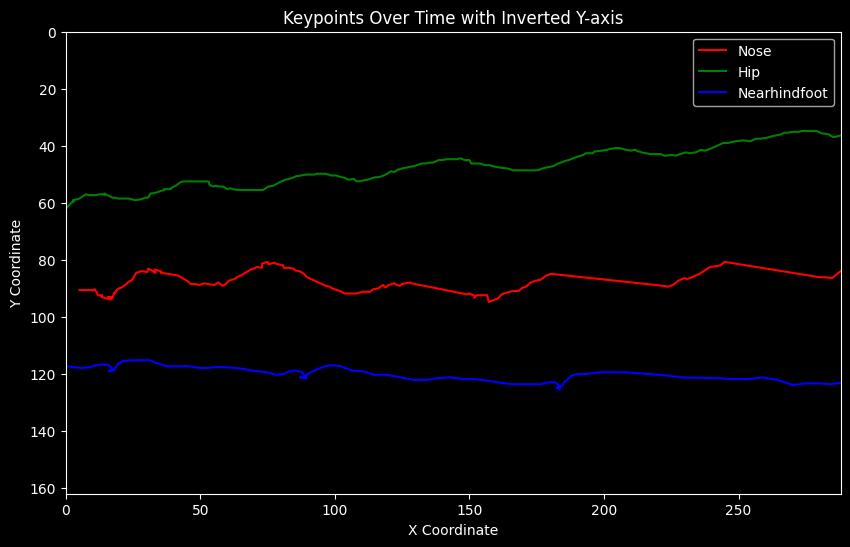

In [13]:
query = "Plot the nose, hip, and nearhindfoot over time. Invert the Y coordinate axis"
qa_message = amadeus.step(query)
qa_message = parse_result(amadeus, qa_message)

In [ ]:
query = """ make an animation of the horse keypoints over time. Overlap the image frame on it. Save the animation on the disk. """
qa_message = amadeus.step(query)
qa_message = parse_result(amadeus, qa_message)